Projeto Escola Do Rio de Janeiro:

1 - A rede municipal é administrada pela prefeitura da cidade, enquanto a rede estadual é administrada pelo governo do estado. 

2 - A rede municipal oferece educação infantil e ensino fundamental, enquanto a rede estadual oferece ensino fundamental e médio.

3 - Ambos os poderes (Prefeitura e Estado) tem o dever de entregar os livros aos estudantes. 




In [126]:
# bibliotecas necessarias para a parte de transformação e limpeza do projeto
import pandas as pd
import math
from unidecode import unidecode

### Tratando os DFs

In [127]:
# importando df escolas para checar as particularidades do df
df_escolas = pd.read_csv("data/escolas.csv", delimiter=",")
display(df_escolas)

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"
150,606,EM PROFESSOR CASTILHO,ILHA DE GUARATIBA,Caminho da Matriz 4406,"-22,994124","-43,593683"


In [128]:
df_escolas.isnull().sum()

id                0
Escolas_Postos    0
BAIRRO            0
ENDEREÇO          0
lat               0
lon               0
dtype: int64

Com uma primeira olhada no dataset, conseguimos ver algumas coisas que não estão padronizadas, como o nome das colunas, diferenças entre registros (maiúsculos e minúsculos) e registros de id duplicados. Os IDs duplicados mostram que a mesma escola está aparecendo mais de uma vez no dataset. 

Juntando a isso, já vamos ajustar o ID para ficar como strings de 3 números, como foi pedido.

In [129]:
df_escolas[df_escolas.duplicated('id')]

,id,Escolas_Postos,BAIRRO,ENDEREÇO,lat,lon
15,413,EM CÓCIO BARCELOS,COPACABANA,"R. Barão de Ipanema, 34","-22,74828","-43,189063"
20,17,E.M PRESIDENTE JOSE LINHARES,IPANEMA,"R. Barão da Torre, 90","-22,983332","-43,199036"
25,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"
40,660,E.M NOSSA SENHORA DA POMPÉIA,TODOS OS SANTOS,"R. Cirne Maia, 109","-22,892031","-43,279925"
57,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"
60,388,EM CARDEAL CAMARA,PARADA DE LUCAS,"R. Anamá, 98","-22,81527","-43,303566"
78,90,EM THOMAS JEFFERSON,ACARI,Avenida Pastor Martin Luther King Jr S/Nº,"-22,81631","-43,340149"
80,69,ESCOLA MUNICIPAL CARDEAL ARCOVERDE,MADUREIRA,Rua Agostinho Barbalho 401,"-22,876082","-43,343369"
84,89,EM MARIO CLAUDIO,RIO COMPRIDO,"R. Haddock Lobo, 148","-22,917233","-43,211044"
109,520,EM BARONESA DE SAAVEDRA,REALENGO,"R. Mal. Bibiano Costalat, 483-639","-22,87185","-43,432432"


In [130]:
# ajustando nomes de colunas e fazendo um drop nos ids duplicados que existem dentro do dataframe
df_escolas = df_escolas.rename(columns={'Escolas_Postos': 'nome_escola', 
                                        "BAIRRO": "bairro", 
                                        "ENDEREÇO ": "logradouro",
                                        "lat": "latitude",
                                        "lon": "longitude"})

df_escolas = df_escolas.drop_duplicates(subset=['id'])

# ajustando os ids para strings de 3 valores  
df_escolas['id'] = df_escolas['id'].apply(lambda x: '{:03d}'.format(x))
display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude
0,178,CENTRO INTEGRADO DE EDUCAÇÃO PÚBLICA HENFIL,CAJU,Rua Carlos Seidl S/Nº,"-22,880888","-43,225326"
1,634,EM ALICE DO AMARAL PEIXOTO,BENFICA,Rua Ébano 187,"-22,889574","-43,236202"
2,483,EM CELESTINO SILVA,CENTRO,"R. do Lavradio, 56","-22,909293","-43,183579"
3,476,ESCOLA MUNICIPAL FLORIANO PEIXOTO,SÃO CRISTÓVÃO,Praça Argentina 20,"-22,897629","-43,227456"
4,132,EM PEREIRA PASSOS,RIO COMPRIDO,Praça Condessa Paulo de Frontin 45,"-22,924412","-43,208579"
...,...,...,...,...,...,...
146,210,EM DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,Rua Belchior Da Fonseca 643,"-23,001416","-43,638757"
147,474,EM ENGENHEIRO GASTÃO RANGEL,GUARATIBA,Estrada Do Magarça 9.183,"-22,98046","-43,643545"
148,301,EM JONATAS SERRANO,GUARATIBA,"Estrada Do Mato Alto, S/Nº","-22,953163","-43,577409"
149,215,E.M. NARCISA AMALIA,ILHA DE GUARATIBA,Estrada Teodoreto de Camargo S/N.º,"-23,009084","-43,537582"


Já podemos perceber que os dados diminuiram de 152 para 136 com os ajustes dos ids. Além disso, já é visível a padronização no nome das colunas.

Agora, vamos ajustar as colunas com texto, padronizando-as para ficarem sem acento, caracteres especiais e todas maiúsculas. Além disso, criaremos a coluna tipo_escola, que retira da string nome_escola se o tipo é CIEP, EM ou COLEGIO.

In [131]:
def unicode_upper(df, column):
    # função para padronizar strings a partir do unicode e transformando-as em maiúsculo com o método .upper()
    df[f'{column}'] = df[f'{column}'].apply(lambda x: unidecode(x).upper())

unicode_upper(df_escolas, "bairro")
unicode_upper(df_escolas, "logradouro")
unicode_upper(df_escolas, "nome_escola")

# extraindo da string nome_escola os tipos de escola encontrados nos registros do dataset com regex
df_escolas[['tipo_escola', 'nome_escola']] = df_escolas['nome_escola'].str.extract(
    r'(^(?:EM|E\.M\.|E.M|COLEGIO MUNICIPAL|ESCOLA MUNICIPAL|CIEP|CENTRO INTEGRADO DE EDUCACAO PUBLICA - ESTADO|CENTRO INTEGRADO DE EDUCACAO PUBLICA)?)\s*(.+)',
      expand=True)

# a partir desses registros apresentados na extração, transformamos as ocorrências em 3 tipos: "EM", "CIEP" e "COLEGIO"
df_escolas.loc[df_escolas["tipo_escola"].isin(["EM", "E.M.", "EM.", "E.M", "ESCOLA MUNICIPAL"]), "tipo_escola"] = "EM"
df_escolas.loc[df_escolas["tipo_escola"].isin(["CIEP", "CENTRO INTEGRADO DE EDUCACAO PUBLICA - ESTADO", 
                                               "CENTRO INTEGRADO DE EDUCACAO PUBLICA"]), "tipo_escola"] = "CIEP"
df_escolas.loc[df_escolas["tipo_escola"].isin(["COLEGIO MUNICIPAL"]), "tipo_escola"] = "COLEGIO"

display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola
0,178,HENFIL,CAJU,RUA CARLOS SEIDL S/NO,"-22,880888","-43,225326",CIEP
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO 187,"-22,889574","-43,236202",EM
2,483,CELESTINO SILVA,CENTRO,"R. DO LAVRADIO, 56","-22,909293","-43,183579",EM
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA 20,"-22,897629","-43,227456",EM
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN 45,"-22,924412","-43,208579",EM
...,...,...,...,...,...,...,...
146,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA 643,"-23,001416","-43,638757",EM
147,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA 9.183,"-22,98046","-43,643545",EM
148,301,JONATAS SERRANO,GUARATIBA,"ESTRADA DO MATO ALTO, S/NO","-22,953163","-43,577409",EM
149,215,NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO S/N.O,"-23,009084","-43,537582",EM


O dataframe está bem mais agradável aos olhos com essas alterações, mas ainda vamos ajustar mais coisas. Quando olhamos para o logradouro, vemos que não há padronização nos endereços. Vamos ajustar isso com a ajuda de um dicionario e com regex novamente.

E, para finalizar com a manipulação de strings, vamos criar a coluna numero_logradouro para separar os números dos endereços informados:

In [132]:
# Mapear abreviações para termos completos
mapeamento            = {'R':  'RUA', 
                         'AV': 'AVENIDA', 
                         'P':  'PRACA', 
                         'T':  'TRAVESSA',
                         'C':  'CAMINHO',
                         'E':  'ESTRADA'}
# Aplicar a substituição no DataFrame
for key, value in mapeamento.items():
    df_escolas['logradouro'] = df_escolas['logradouro'].replace(rf'^({key}. | {key})', f'{value} ', regex=True)

df_escolas['numero_logradouro'] = df_escolas['logradouro'].str.extract(r'(\d+(?:\.\d+)?|S/N.O|SN|S/N|S/NO)$')
df_escolas['logradouro'] = df_escolas['logradouro'].str.replace(r'(\d+(?:\.\d+)?|S/N.O|SN|S/N|S/NO)$', '', regex=True)
df_escolas['logradouro'] = df_escolas['logradouro'].replace(r',\s*$', '', regex=True)
display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,"-22,880888","-43,225326",CIEP,S/NO
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,"-22,889574","-43,236202",EM,187
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,"-22,909293","-43,183579",EM,56
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,"-22,897629","-43,227456",EM,20
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,"-22,924412","-43,208579",EM,45
...,...,...,...,...,...,...,...,...
146,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA,"-23,001416","-43,638757",EM,643
147,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA,"-22,98046","-43,643545",EM,9.183
148,301,JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO,"-22,953163","-43,577409",EM,S/NO
149,215,NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO,"-23,009084","-43,537582",EM,S/N.O


In [133]:
# padronizando a coluna "numero_logradouro"
df_escolas.loc[df_escolas['numero_logradouro'].isin(['S/N.O','SN', 'S/N', 'S/NO', 'nan']), "numero_logradouro"] = "S/N"
df_escolas["numero_logradouro"] = df_escolas["numero_logradouro"].astype(str).str.replace('.', '')
display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,"-22,880888","-43,225326",CIEP,S/N
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,"-22,889574","-43,236202",EM,187
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,"-22,909293","-43,183579",EM,56
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,"-22,897629","-43,227456",EM,20
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,"-22,924412","-43,208579",EM,45
...,...,...,...,...,...,...,...,...
146,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA,"-23,001416","-43,638757",EM,643
147,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA,"-22,98046","-43,643545",EM,9183
148,301,JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO,"-22,953163","-43,577409",EM,S/N
149,215,NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO,"-23,009084","-43,537582",EM,S/N


Agora, para finalizar a limpeza do dataset, vamos padronziar as colunas latitude e longitude para virarem numericas e com 5 casas decimais apenas:

In [134]:
# tratando os dados das colunas lat e lon e trocando seus tipos
def clean_lat_lon(df, column):
    df[f"{column}"] = df[f"{column}"].str.replace(",", ".")
    df[f"{column}"] = pd.to_numeric(df[f"{column}"], errors='coerce')
    df[f"{column}"] = df[f"{column}"].apply(lambda x: round(x, 5))

clean_lat_lon(df_escolas, "latitude")
clean_lat_lon(df_escolas, "longitude")
df_escolas.info()

<class 'pandas.core.frame.DataFrame'>
Index: 136 entries, 0 to 150
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 136 non-null    object 
 1   nome_escola        136 non-null    object 
 2   bairro             136 non-null    object 
 3   logradouro         136 non-null    object 
 4   latitude           136 non-null    float64
 5   longitude          136 non-null    float64
 6   tipo_escola        136 non-null    object 
 7   numero_logradouro  136 non-null    object 
dtypes: float64(2), object(6)
memory usage: 9.6+ KB


In [135]:
display(df_escolas)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,-22.88089,-43.22533,CIEP,S/N
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,-22.88957,-43.23620,EM,187
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,-22.90929,-43.18358,EM,56
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,-22.89763,-43.22746,EM,20
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,-22.92441,-43.20858,EM,45
...,...,...,...,...,...,...,...,...
146,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA,-23.00142,-43.63876,EM,643
147,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA,-22.98046,-43.64355,EM,9183
148,301,JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO,-22.95316,-43.57741,EM,S/N
149,215,NARCISA AMALIA,ILHA DE GUARATIBA,ESTRADA TEODORETO DE CAMARGO,-23.00908,-43.53758,EM,S/N


Até o momento temos o DF de escolas limpo e de uma maneira mais interessante para visualização. Mas, sabemos que não acaba por ai, precisamos padronizar os outros DFs e fazer um merge entre eles para conseguirmos exportar o .csv com as informações necessárias.

### Adicionando outros DFs, transformando eles e fazendo o merge para o DF final

In [136]:
df_materiais = pd.read_csv("data/material_didatico.csv", delimiter=",")
df_materiais.head()

,id,Quantidade
0,178,20
1,634,121
2,483,220
3,476,190
4,132,67


In [137]:
df_materiais.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          151 non-null    int64 
 1   Quantidade  147 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.5+ KB


In [138]:
df_materiais.isnull().sum()

id            0
Quantidade    4
dtype: int64

Vemos que as colunas do df_materiais estão um pouco bagunçadas e precisaremos alinhá-las com o df_escolas para conseguirmos mergear os dois.

In [139]:
df_materiais = df_materiais.rename(columns={'Quantidade': 'quantidade_materiais'})
df_materiais = df_materiais.drop_duplicates(subset=['id'])
df_materiais['id'] = df_materiais['id'].apply(lambda x: '{:03d}'.format(x))
# mudaremos também o tipo da coluna quantidade_materiais 
df_materiais['quantidade_materiais'] = pd.to_numeric(df_materiais["quantidade_materiais"], errors='coerce')
display(df_materiais)

,id,quantidade_materiais
0,178,20.0
1,634,121.0
2,483,220.0
3,476,190.0
4,132,67.0
...,...,...
146,474,320.0
147,301,335.0
148,215,NaN
149,606,521.0


In [140]:
df_materiais.loc[df_materiais["quantidade_materiais"].isnull()]

,id,quantidade_materiais
14,413,NaN
31,060,NaN
38,429,NaN
67,260,NaN
76,091,NaN
85,412,NaN
99,492,NaN
117,687,NaN
140,297,NaN
148,215,NaN


Pensamos que talvez esses ids não precisem entrar no dataset final, já que não tem quantidade de materiais para mostrar, por esse motivo, vamos dropá-los no final.

In [141]:
df_subprefeituras = pd.read_csv("data/subprefeituras.csv", delimiter=",")
df_subprefeituras.head()

,nome,subprefeitura
0,Santo Cristo,Centro
1,Gamboa,Centro
2,Saúde,Centro
3,Caju,Centro
4,Centro,Centro


In [142]:
df_subprefeituras.isnull().sum()

nome             0
subprefeitura    0
dtype: int64

In [143]:
# reutilizando a função unicode_upper para as colunas nome (bairro) e subprefeitura do df_subprefeituras:
unicode_upper(df_subprefeituras, "nome")
unicode_upper(df_subprefeituras, "subprefeitura")
df_subprefeituras = df_subprefeituras.rename(columns={'nome': 'bairro'})

df_subprefeituras.head()

,bairro,subprefeitura
0,SANTO CRISTO,CENTRO
1,GAMBOA,CENTRO
2,SAUDE,CENTRO
3,CAJU,CENTRO
4,CENTRO,CENTRO


Agora com os dados alinhados conseguimos aplicar o merge dos três dataframes:

In [144]:
df_union = pd.merge(df_escolas, df_materiais, on="id")
df_union = pd.merge(df_union, df_subprefeituras, on="bairro")
df_union.head()

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro,quantidade_materiais,subprefeitura
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,-22.88089,-43.22533,CIEP,S/N,20.0,CENTRO
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,-22.88957,-43.23620,EM,187,121.0,CENTRO
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,-22.90929,-43.18358,EM,56,220.0,CENTRO
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,-22.89763,-43.22746,EM,20,190.0,CENTRO
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,-22.92441,-43.20858,EM,45,67.0,CENTRO


Lembrando de deletar os IDS que não tem materiais a serem entregues, como visto anteriormente:

In [145]:
df_union = df_union.dropna(subset=['quantidade_materiais'])
display(df_union)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro,quantidade_materiais,subprefeitura
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,-22.88089,-43.22533,CIEP,S/N,20.0,CENTRO
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,-22.88957,-43.23620,EM,187,121.0,CENTRO
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,-22.90929,-43.18358,EM,56,220.0,CENTRO
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,-22.89763,-43.22746,EM,20,190.0,CENTRO
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,-22.92441,-43.20858,EM,45,67.0,CENTRO
...,...,...,...,...,...,...,...,...,...,...
121,289,BERTHA LUTZ,GUARATIBA,ESTRADA DO PIAI,-22.97906,-43.67058,EM,2075,329.0,ZONA OESTE
122,210,DEBORA MENDES DE MORAES,PEDRA DE GUARATIBA,RUA BELCHIOR DA FONSECA,-23.00142,-43.63876,EM,643,570.0,ZONA OESTE
123,474,ENGENHEIRO GASTAO RANGEL,GUARATIBA,ESTRADA DO MAGARCA,-22.98046,-43.64355,EM,9183,320.0,ZONA OESTE
124,301,JONATAS SERRANO,GUARATIBA,ESTRADA DO MATO ALTO,-22.95316,-43.57741,EM,S/N,335.0,ZONA OESTE


### Parte do otimizador

In [146]:
# criando um novo df com colunas necessarias para rodar o otimizador
df = df_union[["id", "latitude", "longitude"]]

In [147]:
display(df)

,id,latitude,longitude
0,178,-22.88089,-43.22533
1,634,-22.88957,-43.23620
2,483,-22.90929,-43.18358
3,476,-22.89763,-43.22746
4,132,-22.92441,-43.20858
...,...,...,...
121,289,-22.97906,-43.67058
122,210,-23.00142,-43.63876
123,474,-22.98046,-43.64355
124,301,-22.95316,-43.57741


In [148]:
pontos_entrega = list(zip(df.latitude, df.longitude))

def distance(point1, point2):
    """
    Calcula a distância entre dois pontos geográficos, usando a fórmula de Haversine.
    """
    lat1, lon1 = point1
    lat2, lon2 = point2
    R = 6371  # raio da Terra em quilômetros
    phi1 = math.radians(lat1)
    phi2 = math.radians(lat2)
    delta_phi = math.radians(lat2 - lat1)
    delta_lambda = math.radians(lon2 - lon1)

    a = (
        math.sin(delta_phi / 2) ** 2
        + math.cos(phi1) * math.cos(phi2) * math.sin(delta_lambda / 2) ** 2
    )
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1 - a))

    d = R * c
    return d


def nearest_neighbor(points):
    unvisited = set(
        range(1, len(points))
    )  # índices que representam os pontos não visitados
    current_point = 0
    route = [current_point]

    while unvisited:
        nearest = min(
            unvisited, key=lambda x: distance(points[current_point], points[x])
        )
        route.append(nearest)
        unvisited.remove(nearest)
        current_point = nearest

    route.append(0)  # Volta ao ponto inicial para fechar o ciclo
    return route


# Exemplo de lista de pontos (latitude, longitude)
# pontos_entrega = [(lat1, lon1), (lat2, lon2), ...]  # Substitua pelos seus pontos

best_route = nearest_neighbor(pontos_entrega)
print("Melhor rota:", best_route)


Melhor rota: [0, 1, 8, 3, 21, 9, 4, 6, 7, 2, 11, 18, 12, 17, 15, 10, 13, 16, 5, 14, 29, 26, 27, 20, 22, 35, 37, 43, 39, 44, 32, 23, 24, 25, 19, 33, 28, 38, 40, 42, 30, 36, 34, 31, 68, 72, 58, 66, 71, 74, 69, 46, 67, 49, 52, 54, 50, 51, 47, 55, 57, 53, 56, 61, 60, 41, 45, 59, 62, 63, 64, 65, 90, 73, 80, 83, 75, 76, 81, 82, 79, 94, 91, 92, 89, 70, 88, 93, 95, 86, 87, 84, 85, 101, 48, 98, 102, 103, 96, 97, 104, 100, 118, 119, 116, 117, 114, 115, 110, 108, 107, 111, 112, 105, 109, 99, 106, 113, 78, 77, 0]


In [149]:
indices_to_ids = {i: id for i, id in enumerate(df['id'])}
best_route_with_ids = [indices_to_ids[index] for index in best_route]
best_route_with_ids.pop()
print(best_route_with_ids)

['178', '634', '600', '476', '638', '089', '132', '055', '490', '483', '331', '035', '450', '523', '309', '387', '558', '268', '017', '540', '382', '587', '653', '226', '126', '157', '117', '259', '351', '422', '025', '180', '163', '361', '011', '373', '660', '502', '135', '440', '217', '020', '624', '378', '603', '514', '069', '248', '031', '415', '673', '537', '623', '146', '663', '161', '566', '498', '230', '263', '140', '121', '118', '676', '274', '388', '041', '090', '390', '608', '589', '256', '495', '023', '206', '527', '016', '570', '466', '636', '211', '477', '641', '689', '576', '520', '308', '171', '568', '398', '175', '586', '080', '534', '379', '616', '342', '052', '399', '255', '139', '144', '301', '606', '210', '474', '515', '289', '584', '246', '560', '311', '316', '323', '319', '320', '573', '497', '202', '690']


In [150]:
df_sorted = df_union.sort_values(by='id', key=lambda x: x.map({id: i for i, id in enumerate(best_route_with_ids)}))

In [151]:
df_sorted.head(30)

,id,nome_escola,bairro,logradouro,latitude,longitude,tipo_escola,numero_logradouro,quantidade_materiais,subprefeitura
0,178,HENFIL,CAJU,RUA CARLOS SEIDL,-22.88089,-43.22533,CIEP,S/N,20.0,CENTRO
1,634,ALICE DO AMARAL PEIXOTO,BENFICA,RUA EBANO,-22.88957,-43.23620,EM,187,121.0,CENTRO
8,600,URUGUAI,BENFICA,RUA ANA NERI,-22.89849,-43.23776,EM,192,591.0,CENTRO
3,476,FLORIANO PEIXOTO,SAO CRISTOVAO,PRACA ARGENTINA,-22.89763,-43.22746,EM,20,190.0,CENTRO
22,638,AZEVEDO SODRE,PRACA DA BANDEIRA,RUA BARAO DE UBA,-22.91545,-43.21109,EM,331,293.0,GRANDE TIJUCA
9,089,MARIO CLAUDIO,RIO COMPRIDO,RUA HADDOCK LOBO,-22.91723,-43.21104,EM,148,473.0,CENTRO
4,132,PEREIRA PASSOS,RIO COMPRIDO,PRACA CONDESSA PAULO DE FRONTIN,-22.92441,-43.20858,EM,45,67.0,CENTRO
6,055,SANTA CATARINA,SANTA TERESA,RUA EDUARDO SANTOS,-22.91553,-43.19159,EM,38,92.0,CENTRO
7,490,TIA CIATA,CENTRO,AVENIDA PRESIDENTE VARGAS,-22.90712,-43.19507,EM,S/N,578.0,CENTRO
2,483,CELESTINO SILVA,CENTRO,RUA DO LAVRADIO,-22.90929,-43.18358,EM,56,220.0,CENTRO


In [152]:
df_sorted.to_csv('data/best_school_route.csv', index=False)

## Análises dos resultados:

In [153]:
# importando as bibliotecas necessárias para a análise e plotagem dos gráficos
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import plotly.graph_objects as go
import folium

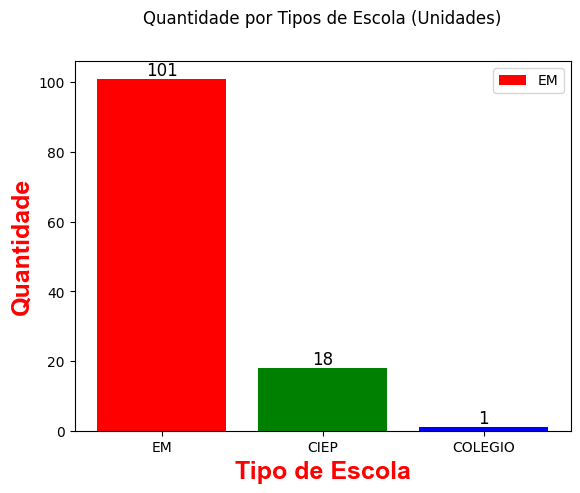

In [156]:
dfescolas = pd.read_csv("data/best_school_route.csv")

tipo_escola_contagem = dfescolas["tipo_escola"].value_counts()

plt.bar(tipo_escola_contagem.index, tipo_escola_contagem, color=["r", "g", "b"])
plt.legend(tipo_escola_contagem.index, loc="best")

for i in range(len(tipo_escola_contagem)):
    plt.annotate(str(tipo_escola_contagem.iloc[i]), 
                 (tipo_escola_contagem.index[i], tipo_escola_contagem.iloc[i]), 
                 ha='center', va='bottom', fontsize=12)

plt.xlabel("Tipo de Escola", fontsize=18, fontweight="bold", fontfamily="Arial", color="red")

plt.ylabel("Quantidade", fontsize=18, fontweight="bold", fontfamily="Arial", color="red")

plt.title("Quantidade por Tipos de Escola (Unidades)", y=1.08)

plt.show()

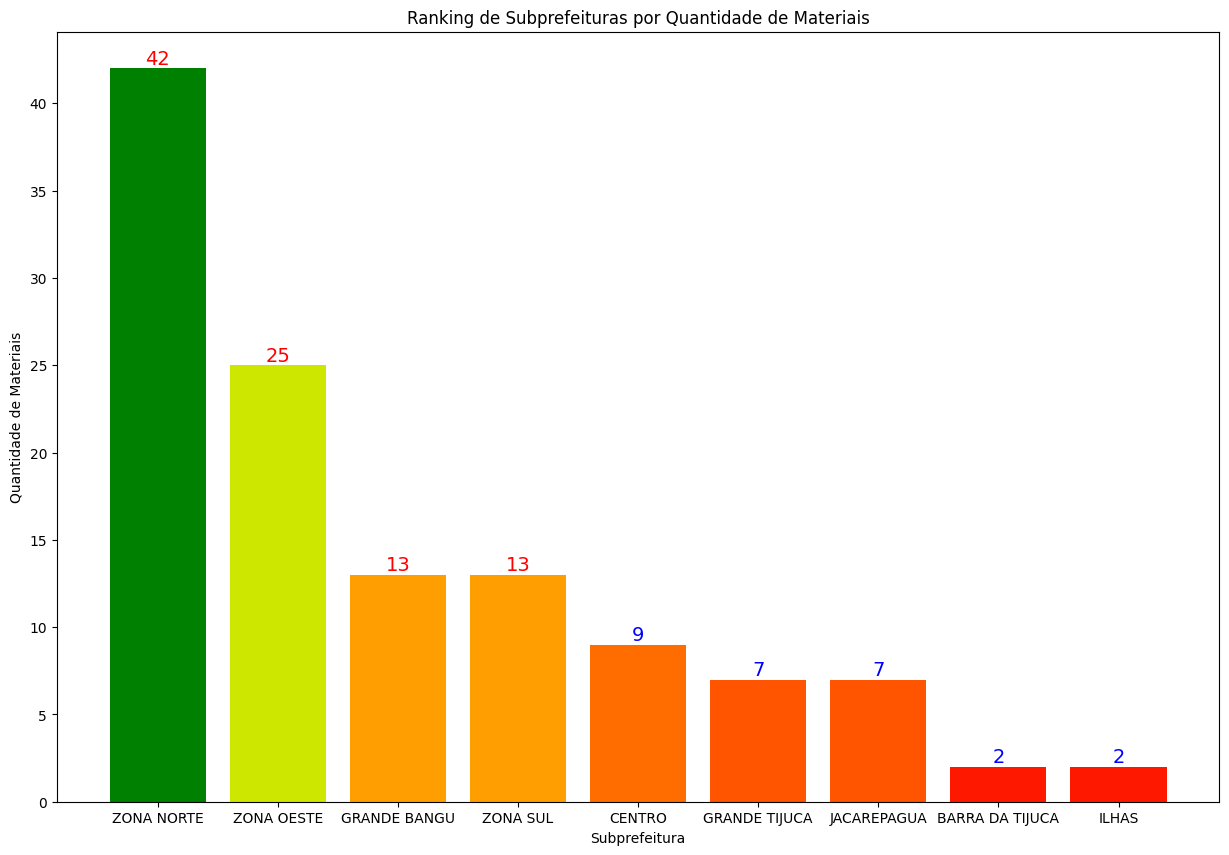

In [157]:
dfranksubprf = pd.read_csv('data/best_school_route.csv')

plt.figure(figsize=(15, 10))

ranking_subprefeituras = dfranksubprf.groupby('subprefeitura')['quantidade_materiais'].count().sort_values(ascending=False)
ranking_subprefeituras.__repr__ = lambda _: ''

cmap = colors.LinearSegmentedColormap.from_list("degrade", ["red", "yellow", "green"])

plt.bar(ranking_subprefeituras.index, ranking_subprefeituras, width=0.8, color=cmap(ranking_subprefeituras.values/ranking_subprefeituras.max()))
plt.title("Ranking de Subprefeituras por Quantidade de Materiais")
plt.xlabel("Subprefeitura", color="black")
plt.ylabel("Quantidade de Materiais", color="black")

for i in range(len(ranking_subprefeituras)):
    color = 'red' if ranking_subprefeituras.iloc[i] > 10 else 'blue'
    rotation = 90 if ranking_subprefeituras.iloc[i] > 100 else 0
    plt.annotate(str(ranking_subprefeituras.iloc[i]),
                 (ranking_subprefeituras.index[i], ranking_subprefeituras.iloc[i]),
                 ha='center', va='bottom', fontsize=14, color=color, rotation=rotation)

plt.show()

Análise do otimizador:

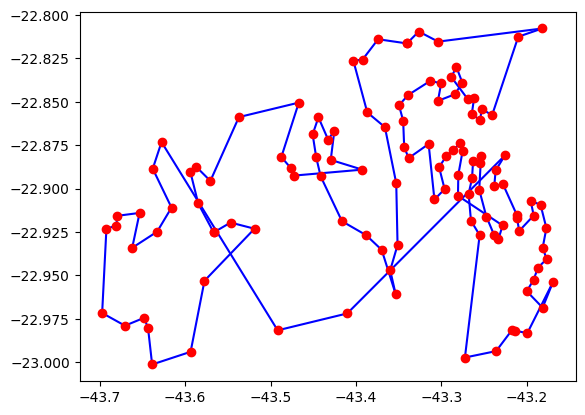

In [158]:
# Cria uma nova figura
plt.figure()

# Desenha a rota: um segmento de linha entre cada ponto consecutivo
for i in range(1, len(best_route)):
    p1 = pontos_entrega[best_route[i-1]]
    p2 = pontos_entrega[best_route[i]]
    plt.plot([p1[1], p2[1]], [p1[0], p2[0]], 'b-')

# Desenha os pontos de entrega
lats = [p[0] for p in pontos_entrega]
lons = [p[1] for p in pontos_entrega]
plt.plot(lons, lats, 'ro')

# Mostra o gráfico
plt.show()

In [159]:
# Cria um mapa centrado na cidade do Rio de Janeiro
mapa = folium.Map(location=[-22.9068, -43.1729], zoom_start=12)

# Adiciona os pontos de entrega ao mapa
for ponto in pontos_entrega:
    folium.Marker(location=ponto).add_to(mapa)

# Adiciona a rota ao mapa
folium.PolyLine(locations=[pontos_entrega[i] for i in best_route], color="black").add_to(mapa)

# Exibe o mapa
mapa
